# Hierarchical clustering with Sequenzo

*24 March 2025, Yuqi Liang and Jan Meyerhoff-Liang*

Table of content
1. Compare dissimilarity measures based on CO₂ emissions data on the country level (1800 - 2022)
2. Analyze the execution time of different dissimilarity measures in R and Python based on big data

## 1. Get a rough idea of the data

In [9]:
# Import necessary libraries
from sequenzo import * # Social sequence analysis 
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
df = load_dataset('country_co2_emissions')

# Show the dataframe
df

Available datasets in Sequenzo:  ['chinese_colonial_territories', 'country_gdp_per_capita', 'country_co2_emissions']


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low
1,Albania,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle
2,Algeria,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle
3,Andorra,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
4,Angola,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,High,High,High,High,High,High,High,High,High,...,High,High,High,Middle,Middle,Middle,Low,Low,Low,Low
189,Vietnam,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,Low,Low,Low,Low,Low,Middle,Middle,Middle,Middle,Middle
190,Yemen,High,High,High,High,High,High,High,High,High,...,Low,Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low
191,Zambia,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low


The classification is based on each years' CO₂ per capita values:

* Very Low (Bottom 20%)
* Low (20-40%)
* Middle (40-60%)
* High (60-80%)
* Very High (Top 20%)

Using a jorgan in social sequence analysis, each category is called a **state**, and the sequence of states is called a social sequence. In sum, the dataset shows the level of the CO₂ emissions per capita of each country in each year. 

## 2. Analyze Social Sequences with Sequenzo

In [2]:
# Create a SequenceData object

# Define the time-span variable
time = list(df.columns)[1:]

states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']

sequence_data = SequenceData(df, time=time, id_col="country", states=states)

sequence_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 193
[>] Min/Max sequence length: 223 / 223
[>] Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High']


SequenceData(193 sequences, Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High'])

## Visualization

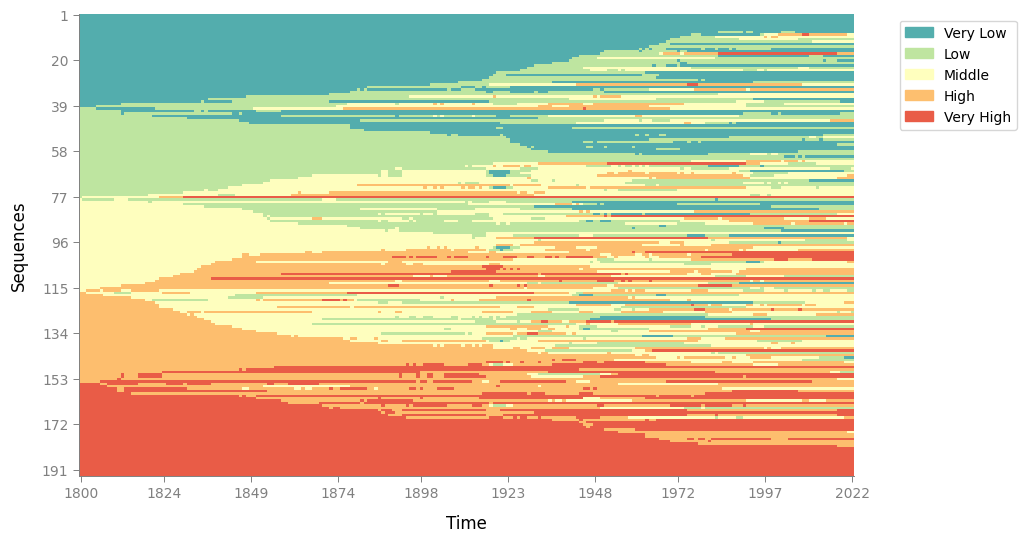

In [3]:
# Plot the index plot

plot_sequence_index(sequence_data, save_as='index_plot')

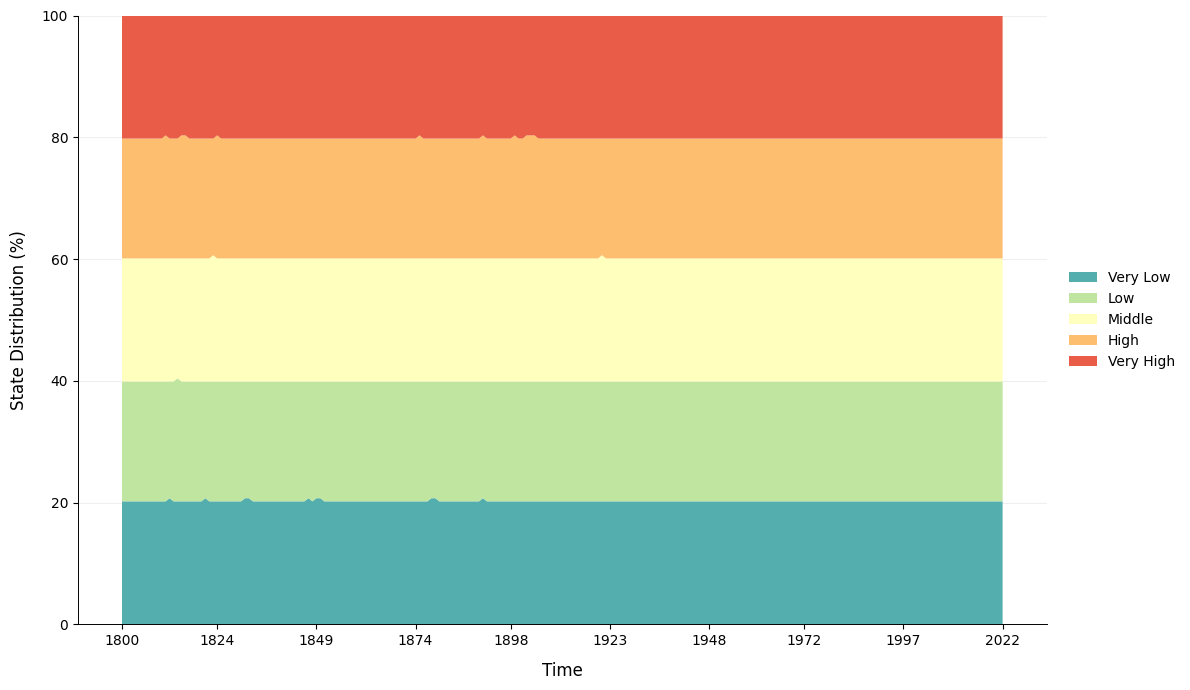

In [4]:
from sequenzo.visualization import plot_state_distribution

plot_state_distribution(sequence_data, save_as='state_distribution')

## Dissimilarity Measures

To better understand dissimialrity measures, we focus on some typical countries in our data.

In [12]:
compared_countries = ['United Kingdom', 'United States', 'China', 'Germany', 'India', 'Russia', 'Brazil', 'South Africa', 'Australia']

selected_countries_df = df[df['country'].isin(compared_countries)]

selected_countries_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
8,Australia,Low,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
23,Brazil,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,High,High,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle
35,China,High,High,High,High,High,High,High,High,High,...,Middle,Middle,Middle,Middle,Middle,Middle,Middle,High,High,High
63,Germany,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
76,India,High,High,High,High,High,High,High,High,High,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
140,Russia,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,High,High,High,High,High,High,High,High,High,High
154,South Africa,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle
183,United Kingdom,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
184,United States,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High


In [13]:
selected_sequence_data = SequenceData(selected_countries_df, time=time, id_col="country", states=states)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 9
[>] Min/Max sequence length: 223 / 223
[>] Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High']


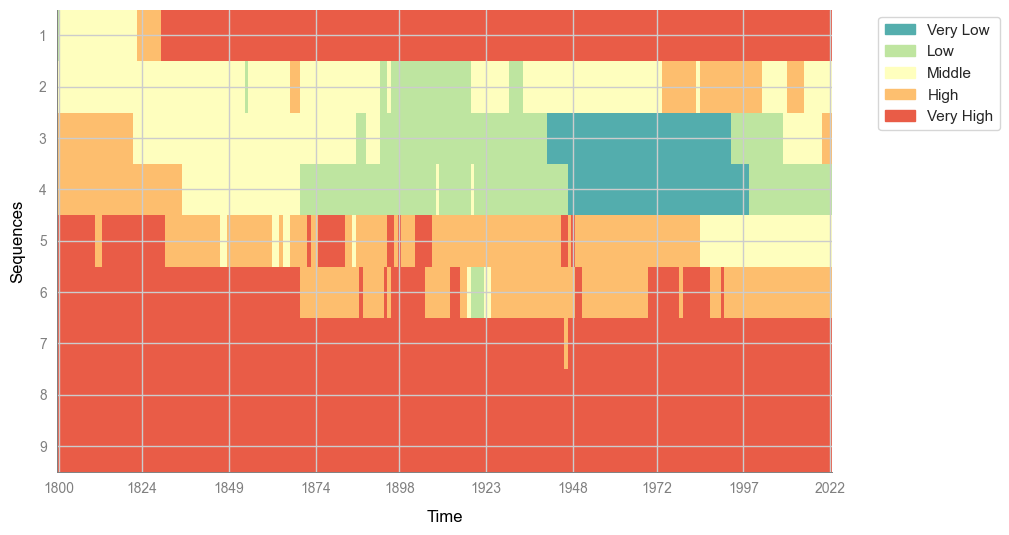

In [14]:
plot_sequence_index(save_as='index_plot_selected', seqdata=selected_sequence_data)

# TODO: 怎么突然有格子？

With country labels:

<img src="selected_index_plot_with_country_labels.png" alt="drawing" width="1200"/>

In [3]:
om_indel_1_sm_2 = get_distance_matrix(seqdata=sequence_data,
                                      method='OM',
                                      indel=1,
                                      sm="CONSTANT")

om_indel_1_sm_2

[!] cpu_affinity() not supported on this platform. Skipping...
[>] Processing 193 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 175 unique sequences.
[>] Sequence length: min/max = 223 / 223.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.0,152.0,386.0,446.0,114.0,446.0,446.0,326.0,444.0,446.0,...,446.0,446.0,446.0,268.0,314.0,438.0,266.0,324.0,60.0,308.0
Albania,152.0,0.0,272.0,446.0,82.0,312.0,446.0,244.0,400.0,446.0,...,446.0,446.0,446.0,212.0,388.0,432.0,302.0,320.0,134.0,312.0
Algeria,386.0,272.0,0.0,446.0,346.0,180.0,356.0,154.0,386.0,440.0,...,446.0,446.0,326.0,270.0,386.0,320.0,272.0,200.0,386.0,264.0
Andorra,446.0,446.0,446.0,0.0,446.0,446.0,90.0,446.0,60.0,6.0,...,0.0,0.0,120.0,446.0,446.0,202.0,446.0,446.0,446.0,446.0
Angola,114.0,82.0,346.0,446.0,0.0,378.0,446.0,286.0,400.0,446.0,...,446.0,446.0,446.0,210.0,326.0,432.0,268.0,296.0,100.0,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,438.0,432.0,320.0,202.0,432.0,282.0,136.0,354.0,188.0,196.0,...,202.0,202.0,136.0,428.0,438.0,0.0,432.0,308.0,438.0,432.0
Vietnam,266.0,302.0,272.0,446.0,268.0,272.0,446.0,266.0,400.0,446.0,...,446.0,446.0,446.0,250.0,258.0,432.0,0.0,178.0,296.0,152.0
Yemen,324.0,320.0,200.0,446.0,296.0,320.0,356.0,284.0,402.0,440.0,...,446.0,446.0,326.0,268.0,268.0,308.0,178.0,0.0,324.0,142.0
Zambia,60.0,134.0,386.0,446.0,100.0,446.0,446.0,334.0,444.0,446.0,...,446.0,446.0,446.0,274.0,330.0,438.0,296.0,324.0,0.0,324.0


[>] Converting DataFrame to NumPy array...
[smart_linkage] OS: darwin → using fastcluster (C++)


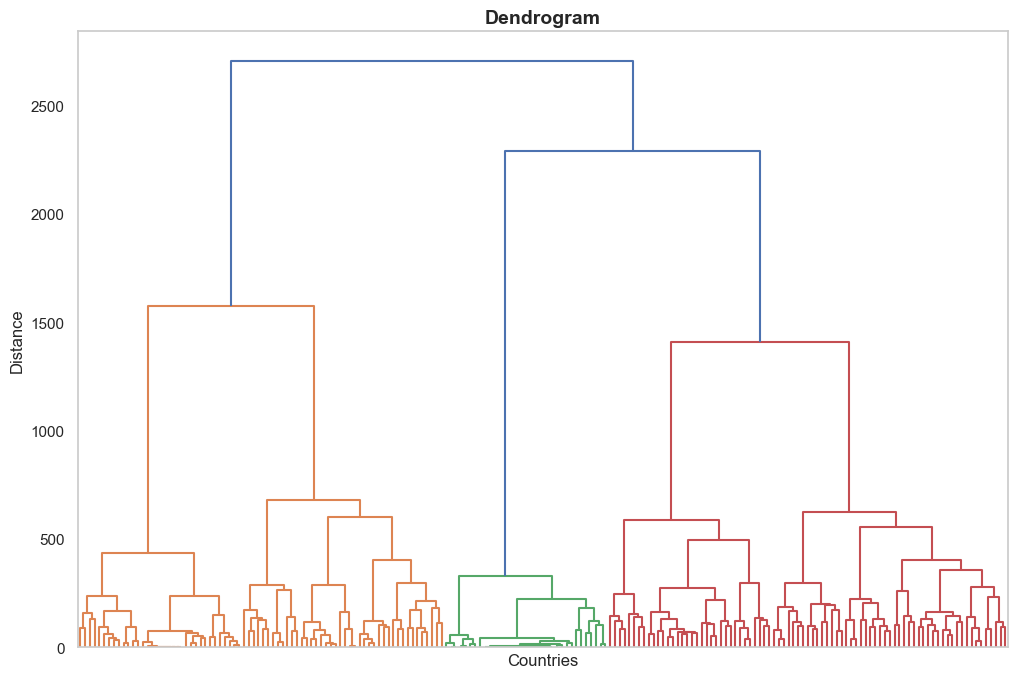

In [4]:
cluster = Cluster(om_indel_1_sm_2, sequence_data.ids, clustering_method='ward_d2')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance", save_as='dendrogram')

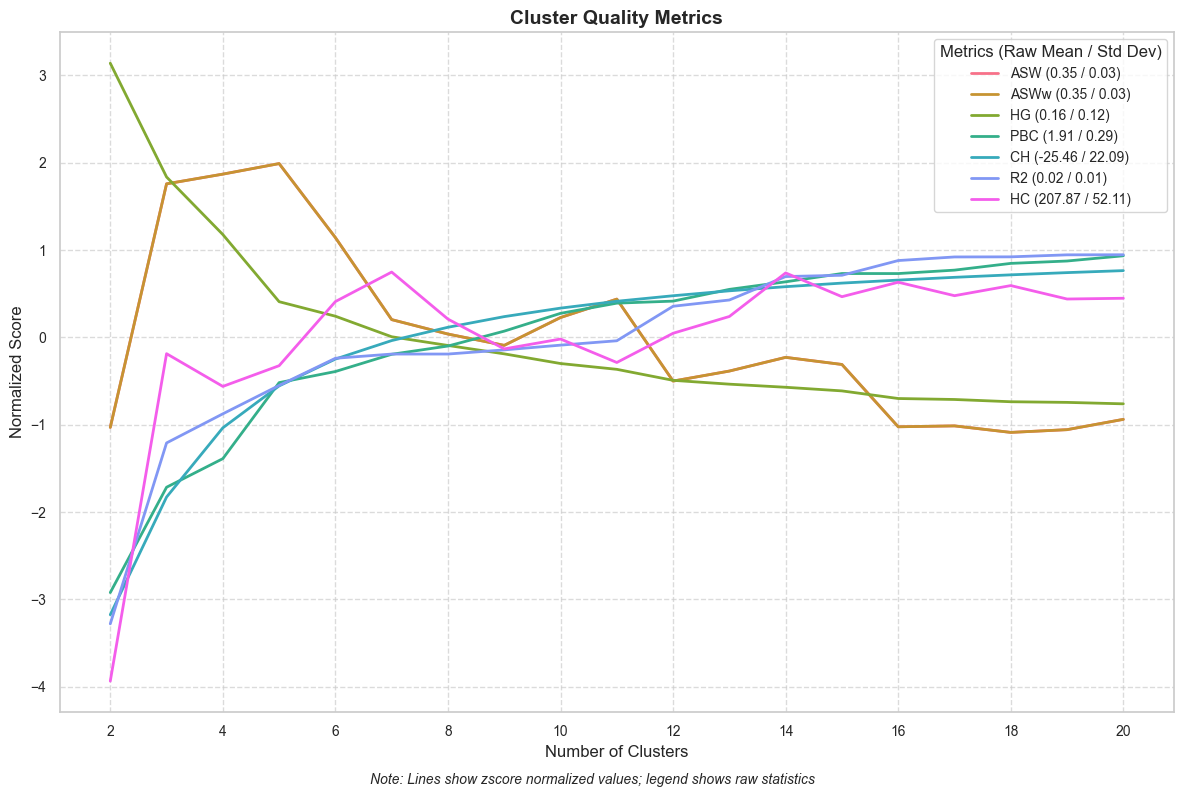

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              5    1.989390       1.989390            1.0
1   ASWw              5    1.989390       1.989390            1.0
2     HG              2    3.138297       3.138297            1.0
3    PBC             20    0.934163       0.934163            1.0
4     CH             20    0.764247       0.764247            1.0
5     R2             20    0.945788       0.945788            1.0
6     HC              7    0.747758       0.747758            1.0


In [5]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

       Entity ID  Cluster ID
0    Afghanistan           1
1        Albania           1
2        Algeria           5
3        Andorra           3
4         Angola           1
..           ...         ...
188    Venezuela           4
189      Vietnam           2
190        Yemen           2
191       Zambia           1
192     Zimbabwe           2

[193 rows x 2 columns]
   Cluster  Count  Percentage
0        1     34       17.62
1        2     42       21.76
2        3     34       17.62
3        4     34       17.62
4        5     49       25.39


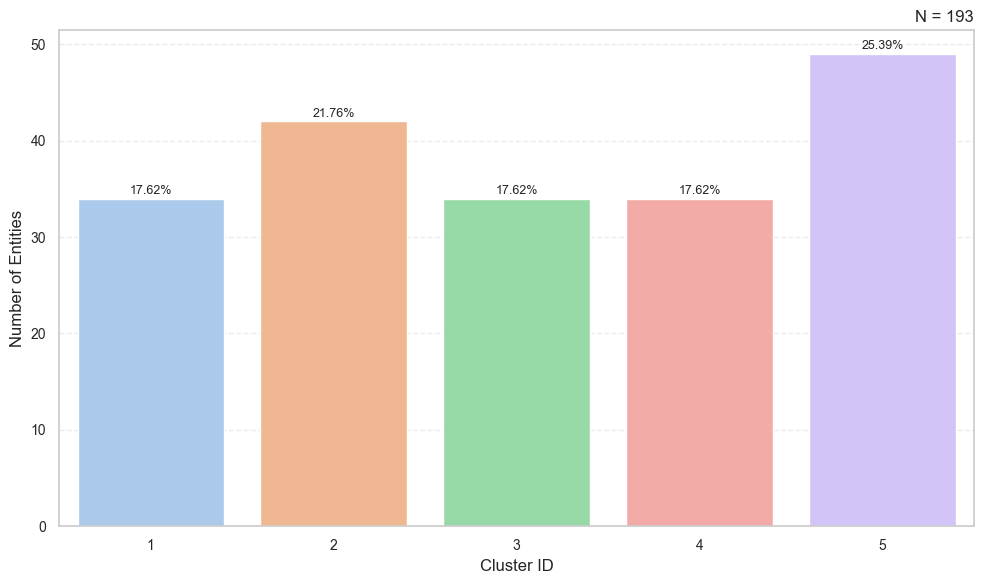

In [7]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=5)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=5)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=5, save_as="distribution.png", title=None)


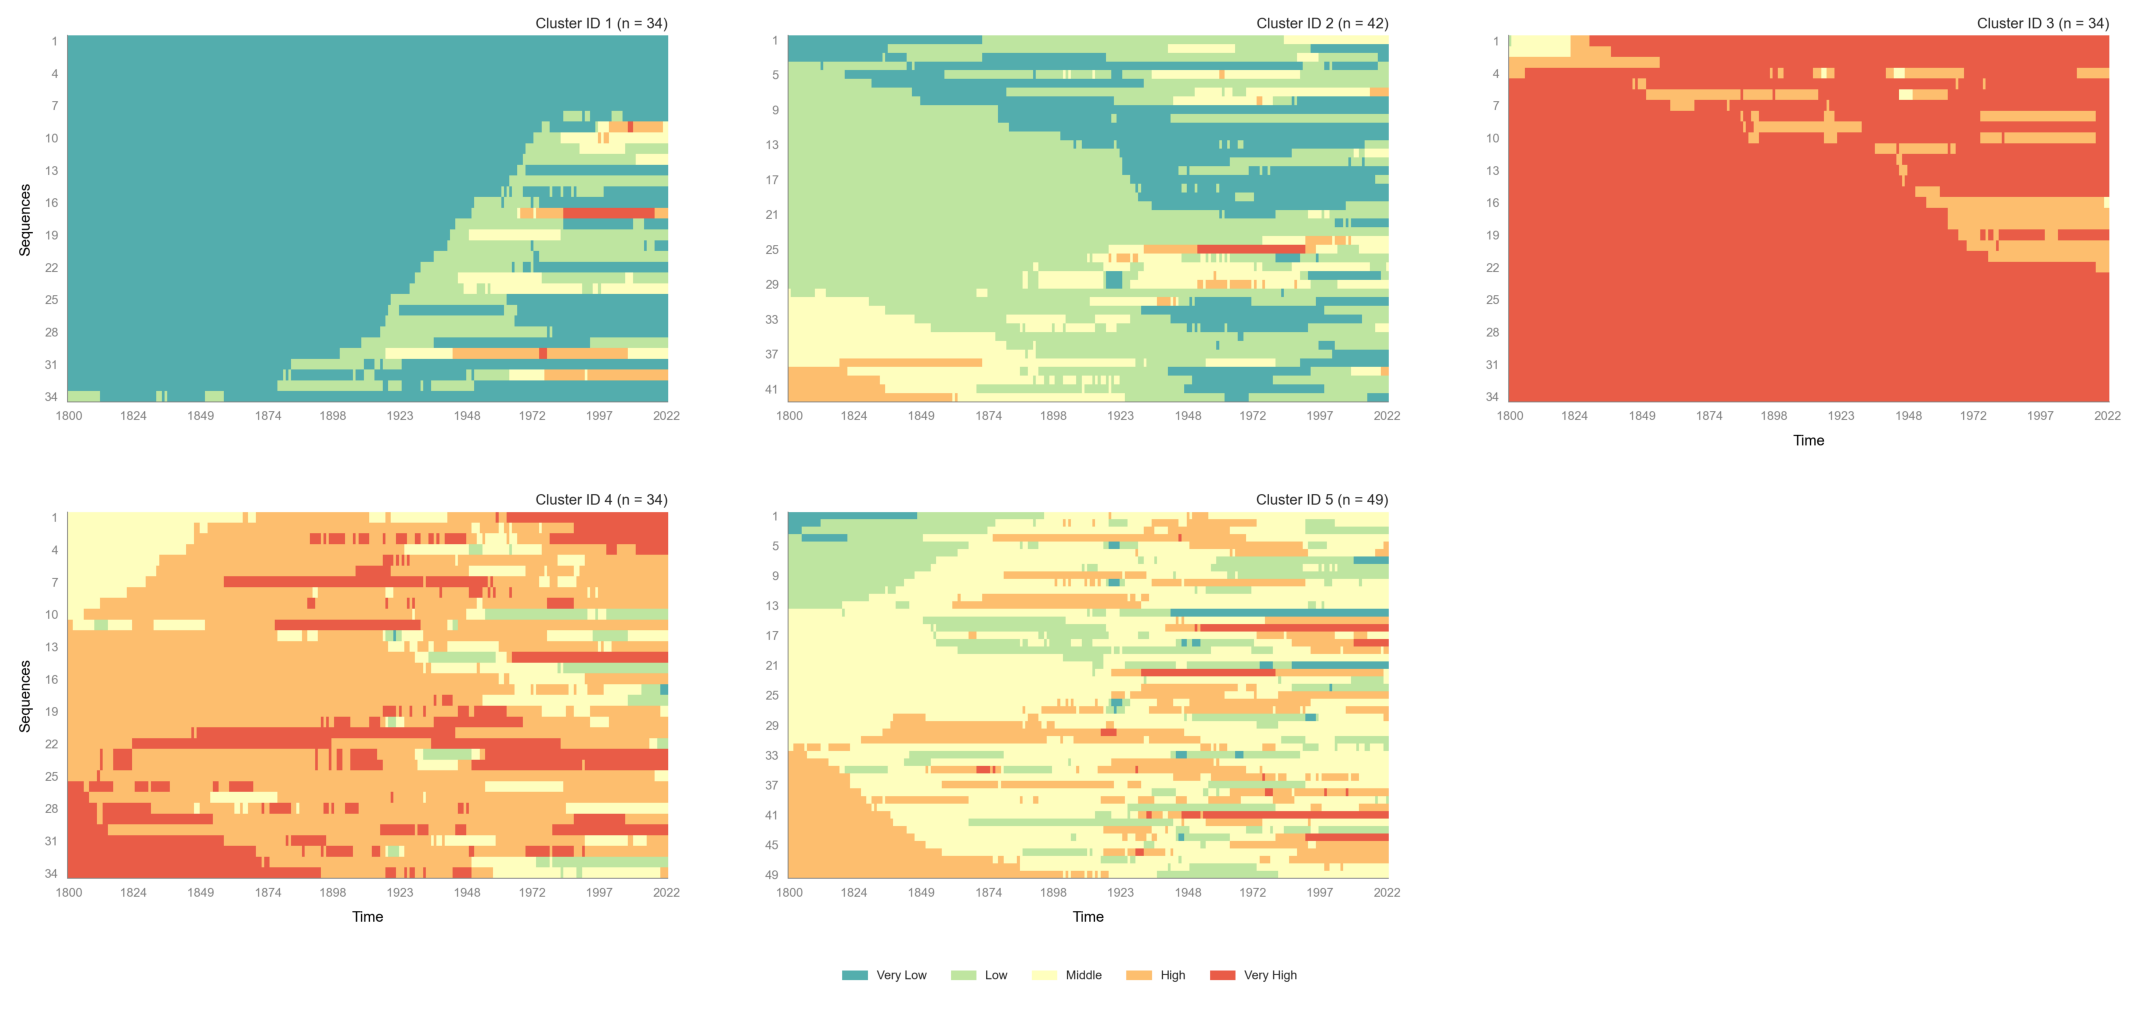

In [8]:
plot_sequence_index(seqdata=sequence_data,
                    group_dataframe=membership_table,
                    group_column_name='Cluster',
                    save_as='cluster_index_plot')

In [15]:
membership_table

,Entity ID,Cluster ID
0,Afghanistan,1
1,Albania,1
2,Algeria,5
3,Andorra,3
4,Angola,1
...,...,...
188,Venezuela,4
189,Vietnam,2
190,Yemen,2
191,Zambia,1


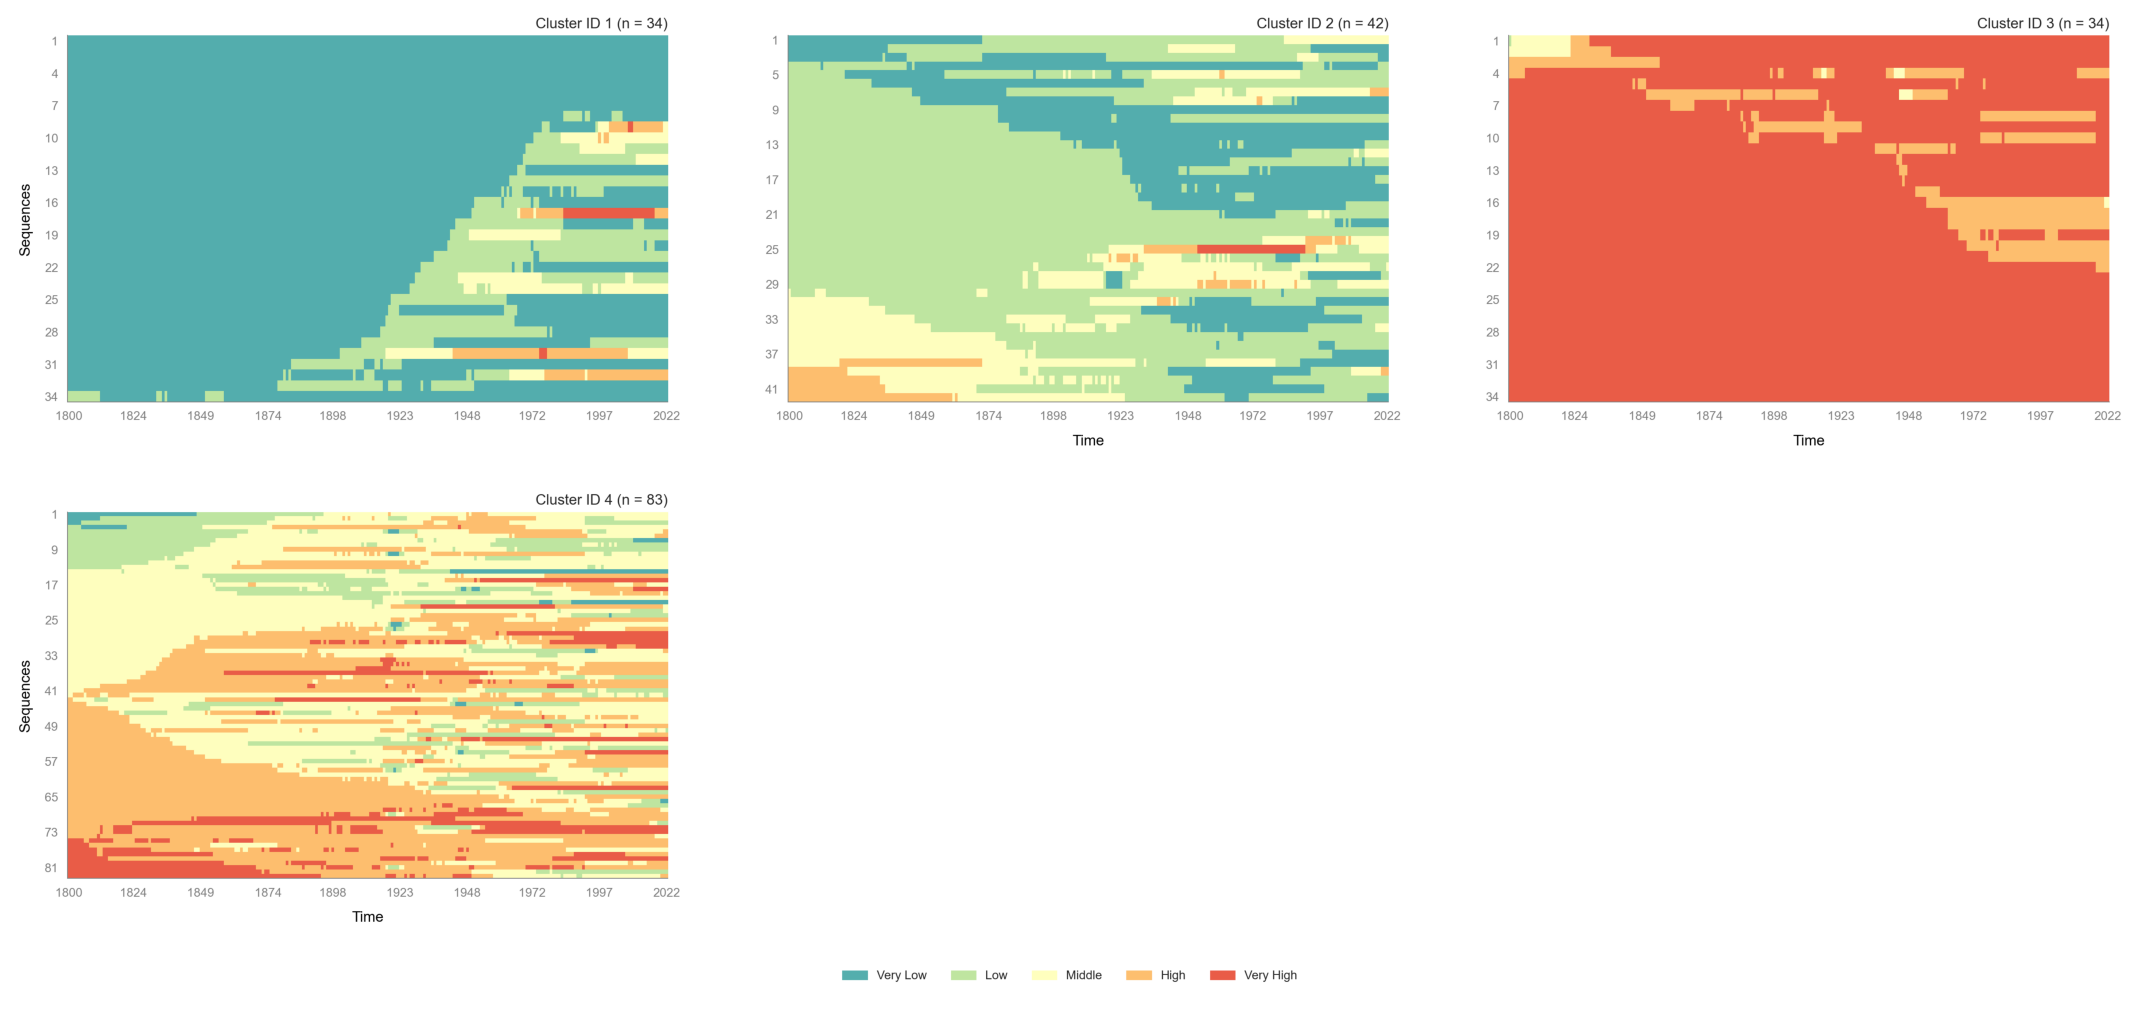

In [16]:
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)

plot_sequence_index(seqdata=sequence_data,
                    group_dataframe=membership_table,
                    group_column_name='Cluster',
                    save_as='cluster_4_index_plot')

# TODO: 做能允许几✖几的图

In [37]:
print("Thank you for learning sequence analysis with Sequenzo! ")
print("We hope you found this tutorial insightful.")
print("\n💡 Stay Curious, keep coding, and discover new insights.")
print("✉️ If you have any questions, please feel free to reach out :)")

Thank you for learning sequence analysis with Sequenzo! 
We hope you found this tutorial insightful.

💡 Stay Curious, keep coding, and discover new insights.
✉️ If you have any questions, please feel free to reach out :)
